In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
import numpy as np
from tslearn.metrics import dtw, cdist_dtw
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import ward, dendrogram, fcluster, single, average, complete
from scipy.stats import spearmanr
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.covariance import LedoitWolf

# 1. Loading in the Data and Basic Analysis

## 1.1 Data Preprocessing

Load in the ETF return data and index return data

In [2]:
mutual_data = pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-MutualFundRet.csv", index_col=0)

In [3]:
Index_data = pd.read_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-index_data.csv",index_col=0)

In [4]:
mutual_data.head()

,DK0015966758,DK0060411247,DK0010270693,DK0060790087,DK0015911507,DK0015168686,DK0060814952,DK0060789071,DK0060048304,DK0010170398,...,DK0060819670,DK0010270503,DK0015919591,DK0060815843,DK0016275118,DK0060477859,DK0060646396,DK0060825214,DK0060360824,DK0000581083
EndDate,,,,,,,,,,,,,,,,,,,,,
2014-09-17,-0.010665,-0.009281,-0.000938,0.000263,-0.000578,0.000414,-0.005513,-0.004706,0.003172,0.001160,...,-0.003328,-0.004566,-0.010929,0.001930,0.000205,-0.002745,-0.003924,0.001413,-0.001910,0.002181
2014-09-24,-0.001760,0.007648,-0.005283,0.001141,-0.009839,0.001892,0.002349,0.004111,-0.002259,0.011781,...,-0.001411,0.003823,-0.011845,-0.009631,-0.000307,0.000444,0.002771,0.002886,0.003614,0.001020
2014-10-01,-0.004334,0.006845,-0.004013,-0.000614,-0.020124,0.003422,-0.010967,0.004709,0.001207,0.013934,...,-0.020371,0.004570,-0.030966,-0.021478,0.000921,-0.009675,-0.011529,-0.002110,-0.005578,-0.013316
2014-10-08,-0.020955,-0.019812,-0.027491,0.000526,0.010652,0.001058,-0.000284,-0.029817,-0.014093,-0.000565,...,-0.025611,-0.028810,-0.027460,0.001123,0.000102,0.006364,0.001133,-0.018327,-0.020734,-0.007230
2014-10-15,-0.010852,-0.031494,-0.058609,0.000088,-0.026728,0.004229,-0.004077,-0.045856,-0.031035,0.004709,...,-0.047177,-0.046838,-0.025674,-0.034873,0.000511,-0.007838,-0.004452,-0.030093,-0.055326,-0.046054


In [5]:
Index_data.head(5)

,AsiaSMALL LoBO,AsiaME1 BO2,AsiaME1 BO3,AsiaME1 BO4,AsiaSMALL HiBO,AsiaME2 BO1,AsiaME2 BO2,AsiaME2 BO3,AsiaME2 BO4,AsiaME2 BO5,...,Insur,RlEst,Fin,Other,LEATTREU Index,LET1TREU Index,LET3TREU Index,LET5TREU Index,LET7TREU Index,LET0TREU Index
,,,,,,,,,,,,,,,,,,,,,
2000-11-15,-0.016350,0.004071,-0.019912,-0.014557,-0.017356,-0.012267,-0.024224,-0.016517,-0.015568,-0.012546,...,0.015049,0.013815,-0.042876,-0.034672,0.003267,0.001545,0.002784,0.003694,0.004148,0.005609
2000-11-22,0.006672,0.016849,0.016397,0.006049,0.003423,-0.006967,0.007591,0.006678,0.008349,0.002632,...,-0.037312,0.011465,-0.089051,-0.058248,0.003461,0.000998,0.001474,0.002552,0.004613,0.010358
2000-11-29,-0.029141,-0.024495,-0.017090,-0.031009,-0.024471,-0.051371,-0.020776,-0.005210,-0.022288,-0.026797,...,0.019825,-0.001677,-0.004267,0.006627,0.006869,0.003444,0.006166,0.007838,0.009037,0.010558
2000-12-06,-0.012367,-0.015601,-0.023586,-0.005379,-0.010344,-0.021430,-0.022750,-0.013214,0.021566,-0.011720,...,0.008048,-0.050099,0.001868,0.027445,0.002910,0.003071,0.004431,0.004902,0.004051,-0.002972
2000-12-13,0.000938,0.015727,0.020245,-0.002130,0.013378,0.011243,0.026620,0.014591,0.020863,0.014379,...,0.010919,0.033585,0.067698,0.006119,0.006227,0.002431,0.004328,0.006113,0.007530,0.014818


The indexes are objects and we need to change them to daytime

In [6]:
mutual_data.index = pd.to_datetime(mutual_data.index, yearfirst=True)

In [7]:
Index_data.index = pd.to_datetime(Index_data.index, yearfirst=True)

Now we can join the two dataframes on the index of the ETF dataframe.

In [8]:
joined = mutual_data.join(Index_data)

In [9]:
joined

,DK0015966758,DK0060411247,DK0010270693,DK0060790087,DK0015911507,DK0015168686,DK0060814952,DK0060789071,DK0060048304,DK0010170398,...,Insur,RlEst,Fin,Other,LEATTREU Index,LET1TREU Index,LET3TREU Index,LET5TREU Index,LET7TREU Index,LET0TREU Index
EndDate,,,,,,,,,,,,,,,,,,,,,
2014-09-17,-0.010665,-0.009281,-0.000938,0.000263,-0.000578,0.000414,-0.005513,-0.004706,0.003172,0.001160,...,0.006067,-0.005924,0.020307,0.013098,0.004270,0.000560,0.002496,0.004411,0.005620,0.007507
2014-09-24,-0.001760,0.007648,-0.005283,0.001141,-0.009839,0.001892,0.002349,0.004111,-0.002259,0.011781,...,0.007661,-0.008260,0.001517,0.005168,0.003626,-0.000056,0.000381,0.001109,0.003562,0.010203
2014-10-01,-0.004334,0.006845,-0.004013,-0.000614,-0.020124,0.003422,-0.010967,0.004709,0.001207,0.013934,...,-0.020985,-0.021133,-0.016002,-0.012500,0.002894,-0.000056,0.000489,0.001491,0.003176,0.007490
2014-10-08,-0.020955,-0.019812,-0.027491,0.000526,0.010652,0.001058,-0.000284,-0.029817,-0.014093,-0.000565,...,-0.000254,-0.004398,0.001961,0.005572,0.001167,-0.000336,0.000077,0.000938,0.002085,0.002663
2014-10-15,-0.010852,-0.031494,-0.058609,0.000088,-0.026728,0.004229,-0.004077,-0.045856,-0.031035,0.004709,...,-0.052006,-0.056164,-0.062589,-0.042066,-0.004158,-0.001175,-0.003055,-0.004442,-0.004556,-0.006895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-08,0.047775,0.044041,0.060891,0.001050,0.057798,-0.000765,0.001640,0.053871,0.062527,-0.007276,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-15,0.008796,0.013150,0.014569,0.007585,0.024684,0.005913,0.017409,0.011793,0.017625,0.006301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-22,0.015552,-0.017020,0.012160,0.002202,0.033286,0.000121,-0.021898,0.022646,0.009546,0.000635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
joined.index.dtype

dtype('<M8[ns]')

We only have the index data until the 2019-04-10 so we need to cut the end of the dataframe.

In [11]:
enddate = "04-11-2019" 

joined = joined[joined.index < enddate]

joined.tail()

,DK0015966758,DK0060411247,DK0010270693,DK0060790087,DK0015911507,DK0015168686,DK0060814952,DK0060789071,DK0060048304,DK0010170398,...,Insur,RlEst,Fin,Other,LEATTREU Index,LET1TREU Index,LET3TREU Index,LET5TREU Index,LET7TREU Index,LET0TREU Index
EndDate,,,,,,,,,,,,,,,,,,,,,
2019-03-13,-0.000919,0.002519,0.005353,0.002573,0.003018,0.003050,0.004080,0.006200,0.006998,0.005797,...,0.018714,-0.002824,-0.001776,0.022301,-0.000839,-0.000167,-0.000460,-0.000675,-0.000740,-0.001616
2019-03-20,0.013745,0.012494,0.006053,0.001203,0.004957,0.000015,0.007549,-0.000561,-0.000611,-0.001372,...,-0.016113,-0.024386,-0.011934,-0.006389,0.008319,0.000222,0.001439,0.003326,0.007220,0.020606
2019-03-27,-0.001298,-0.005976,-0.007936,0.001403,0.004273,0.005718,0.002391,-0.004681,-0.000002,0.019800,...,-0.000718,0.004927,-0.008209,0.003505,0.000740,0.000222,0.000839,0.001018,0.000942,0.000760
2019-04-03,0.041891,0.015862,0.033522,0.000576,0.032917,-0.004149,0.003642,0.028391,0.018082,-0.007260,...,0.018245,0.040046,0.052647,0.019539,-0.002148,-0.000666,-0.001088,-0.001379,-0.002429,-0.003900
2019-04-10,0.005644,0.006620,-0.002683,0.000042,0.002526,0.001856,-0.000575,-0.003730,-0.001137,0.001103,...,0.004748,0.001318,0.003198,-0.011486,-0.000404,0.000333,0.000638,0.000984,0.000106,-0.002371


## 1.2 Return and Standard Deviation <a class="anchor" id="two.one"></a>

Calculate the average yearly return for each asset.

In [12]:
Columns = joined.columns #the columns in the new dataframe are the indexes
ret = pd.DataFrame(columns=Columns) #create an empty dataframe
ret = ret.transpose()

In [13]:
valueslist=[]

for i in range(0, joined.shape[1]):
    counter = 0
    value=1
    for j in range(1,joined.shape[0]):
        value=value*(joined.iloc[j,i]+1)
        counter=counter+1
        
    valueslist.append((1+value**(1/counter)-1)**52-1)
    
ret["AvgReturnYearly"]=valueslist

Calculate the yearly standard deviation for each index.

In [14]:
import math
ret["YearlyStd"] = joined.std()*math.sqrt(52)

In [15]:
ret.head()

,AvgReturnYearly,YearlyStd
DK0015966758,0.058560,0.155299
DK0060411247,0.022940,0.117124
DK0010270693,0.087968,0.157189
DK0060790087,0.013020,0.023357
DK0015911507,0.060717,0.169691


Lets make a scatter plot of the standard deviation vs. the return

In [16]:
# Here we define classes so we can color the index points in red and the ETF points in blue
classes = np.empty(joined.shape[1])

for i in range(0, joined.shape[1]):
    if i in range(0,mutual_data.shape[1]):
        classes[i] = 1
    else:
        classes[i] = 2
    

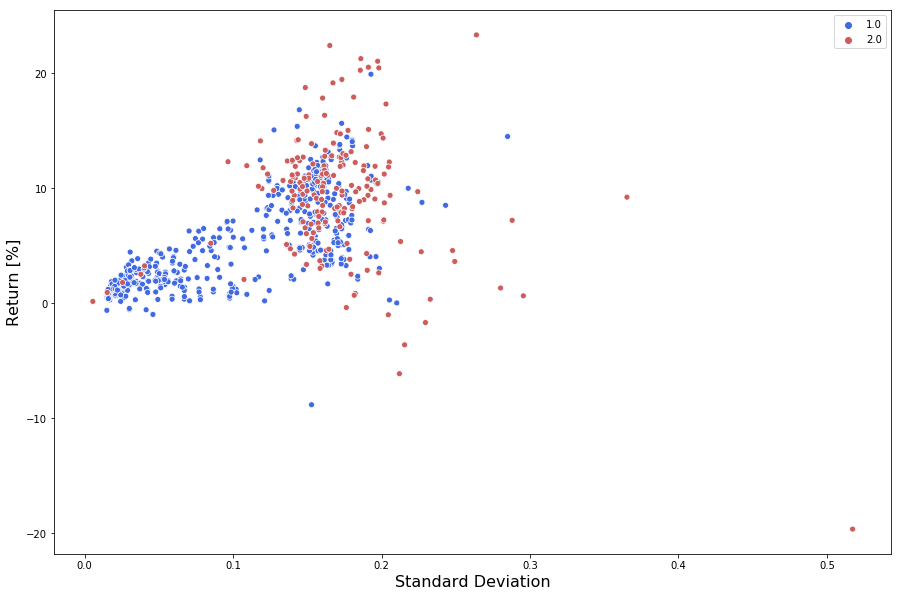

In [17]:
plt.figure(figsize=(15,10))
sns.scatterplot(y=ret["AvgReturnYearly"]*100, x=ret["YearlyStd"], hue=classes, palette=["royalblue", "indianred"], alpha=1)
#plt.title("Yearly Standard Deviation vs. Yearly Returns")
#plt.legend(["ETF"],["Index"])
plt.ylabel("Return [%]", fontsize=16)
plt.xlabel("Standard Deviation", fontsize =16)
plt.show()



It looks like there is an upwards trend in the standard deviation vs. return. What is the correlation between these factors?

In [ ]:
ret.corr()

## 1.3 Plotting cumulative return series

Lets create a new dataframe with cumulative returns over the timeperiod. And use the cumprod() function to calculate the cumulative product.

In [ ]:
joined_cumprod=joined.copy()

joined_cumprod=(joined+1).cumprod()

joined_cumprod = joined_cumprod-1

We want to look at the return series for the ETF data and index data.

**Plot the cmulative return of the index and ETF data.**

In [ ]:
ax = joined_cumprod.iloc[:,:ETF_data.shape[1]].transpose().describe().T.drop(["count","std","mean"], axis=1).plot(figsize=(12,8),grid=True,color=["lightsteelblue", "royalblue", "navy", "royalblue", "lightsteelblue"], label=["ETF min", "ETF 25%", "ETF 50%", "ETF 75%", "ETF max"])
joined_cumprod.iloc[:,ETF_data.shape[1]:].transpose().describe().T.drop(["count","std","mean"], axis=1).plot(figsize=(12,8),grid=True, ax=ax, color=["lightcoral", "red", "darkred", "red", "lightcoral"])
ax.set_ylabel("Cumulative Return", fontsize = 16)
ax.set_ylim(-1,2)
ax.legend(("ETF max", "ETF 75%", "ETF 50%", "ETF 25%", "ETF min", "Index max", "Index 75%", "Index 50%", "Index 25%", "Index min"))


# 2. Clustering <a class="anchor" id="three"></a>

When clustering the indexes the analysis can be divided into three different parts:
- Determining a measure to quantify the similarities between observations
- Determining which clustering method to use
- Finding the optimal number of clusters

In this chapter the main refrence is a thesis written by Pjotr Roelofsen in 2018, on [Time Series Clustering](https://beta.vu.nl/nl/Images/stageverslag-roelofsen_tcm235-882304.pdf).


## 2.1 Distance Measures <a class="anchor" id="three.one"></a>

Many different distance measures can be considered when clustering time series data. In this analysis three different methods will be considered:

- The Euclidean Distance (A Lock-Step Measure)
- The Person Correlation Distance (A Lock-Step Measure)
- The Dynamic Time Wraping (Elastic measure)

These methods were chosen since they seem to be the most popular ones and are straight forward in application. When comparing these three distance measures the calculation time for the DTW measure is much higher than for the Correlation measure, but it is more robust and often outperforms the other.


### 2.1.1 Euclidean Distance
The euclidean distance measure is calculated as $d_{euc}(x,y) = \sqrt{\sum_{i=1}^n(x_i-y_i)^2}$.


In [19]:
res = pdist(joined.transpose(), "euclidean")
squareform(res)
distance_eu=pd.DataFrame(squareform(res), index=joined.columns, columns = joined.columns)

In [20]:
distance_eu

,DK0015966758,DK0060411247,DK0010270693,DK0060790087,DK0015911507,DK0015168686,DK0060814952,DK0060789071,DK0060048304,DK0010170398,...,Insur,RlEst,Fin,Other,LEATTREU Index,LET1TREU Index,LET3TREU Index,LET5TREU Index,LET7TREU Index,LET0TREU Index
DK0015966758,0.000000,0.222109,0.201488,0.315762,0.183349,0.329342,0.296824,0.192718,0.213114,0.311840,...,0.318072,0.360314,0.359125,0.312343,0.335794,0.333092,0.333523,0.333953,0.337138,0.363950
DK0060411247,0.222109,0.000000,0.224472,0.230539,0.263413,0.246460,0.216683,0.194443,0.168518,0.241497,...,0.292591,0.387733,0.364425,0.282312,0.257855,0.250889,0.251761,0.253644,0.260490,0.297419
DK0010270693,0.201488,0.224472,0.000000,0.326362,0.254040,0.341285,0.317287,0.107699,0.173431,0.322353,...,0.257147,0.314117,0.281262,0.263151,0.343795,0.337517,0.337937,0.338935,0.344413,0.377186
DK0060790087,0.315762,0.230539,0.326362,0.000000,0.346157,0.031744,0.114057,0.298053,0.233799,0.125185,...,0.343193,0.446726,0.435472,0.331432,0.089590,0.051456,0.058100,0.070485,0.094853,0.181882
DK0015911507,0.183349,0.263413,0.254040,0.346157,0.000000,0.361256,0.313361,0.253257,0.258062,0.354815,...,0.366372,0.401240,0.395412,0.354046,0.364321,0.363777,0.363313,0.362383,0.363579,0.389925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LET1TREU Index,0.333092,0.250889,0.337517,0.051456,0.363777,0.050590,0.145157,0.310576,0.249324,0.136052,...,0.346830,0.456132,0.440271,0.337908,0.073943,0.000000,0.021859,0.045428,0.079191,0.176323
LET3TREU Index,0.333523,0.251761,0.337937,0.058100,0.363313,0.054462,0.148481,0.310391,0.248212,0.133798,...,0.346967,0.456745,0.442101,0.337750,0.057510,0.021859,0.000000,0.025026,0.061163,0.160927
LET5TREU Index,0.333953,0.253644,0.338935,0.070485,0.362383,0.064721,0.154857,0.310773,0.247505,0.133147,...,0.348061,0.457927,0.445118,0.338965,0.037039,0.045428,0.025026,0.000000,0.037933,0.139533
LET7TREU Index,0.337138,0.260490,0.344413,0.094853,0.363579,0.087073,0.169458,0.315210,0.250591,0.135967,...,0.352570,0.462584,0.453071,0.344425,0.017478,0.079191,0.061163,0.037933,0.000000,0.105297


In [21]:
joined_norm = joined.copy()
joined_norm = (joined - joined.mean())/joined.std()
joined_norm.head()

,DK0015966758,DK0060411247,DK0010270693,DK0060790087,DK0015911507,DK0015168686,DK0060814952,DK0060789071,DK0060048304,DK0010170398,...,Insur,RlEst,Fin,Other,LEATTREU Index,LET1TREU Index,LET3TREU Index,LET5TREU Index,LET7TREU Index,LET0TREU Index
EndDate,,,,,,,,,,,,,,,,,,,,,
2014-09-17,-0.554612,-0.603918,-0.127915,0.002878,-0.084259,0.008582,-0.621420,-0.328851,0.095047,0.053430,...,0.119016,-0.248641,0.622553,0.529949,0.716929,0.692771,1.094589,1.142153,0.887765,0.545941
2014-09-24,-0.141109,0.438355,-0.327226,0.273864,-0.477784,0.460386,0.221089,0.110709,-0.242112,1.248289,...,0.190735,-0.327789,-0.039320,0.167310,0.594192,-0.119763,0.088889,0.209089,0.519888,0.774886
2014-10-01,-0.260646,0.388903,-0.268956,-0.267935,-0.914843,0.928339,-1.205928,0.140489,-0.026934,1.490550,...,-1.098235,-0.763973,-0.656408,-0.640640,0.454497,-0.119767,0.140383,0.317022,0.450928,0.544509
2014-10-08,-1.032389,-1.252324,-1.346046,0.084073,0.392980,0.205625,-0.061102,-1.580757,-0.976871,-0.140624,...,-0.165397,-0.196924,-0.023685,0.185776,0.125298,-0.488958,-0.055663,0.160736,0.255827,0.134639
2014-10-15,-0.563298,-1.971541,-2.773552,-0.051374,-1.195523,1.175102,-0.467492,-2.380321,-2.028737,0.452697,...,-2.494141,-1.950937,-2.297387,-1.992664,-0.890026,-1.597039,-1.544808,-1.359596,-0.931261,-0.676834


### 2.1.2 Spearman!!! Correlation Distance<a class="anchor" id="three.one.one"></a>

In the Pearson Correlation Distance the linear association between two time series is calculated. For further information on how the correlation is defined, see [chapter 2.1.2](https://beta.vu.nl/nl/Images/stageverslag-roelofsen_tcm235-882304.pdf). The correlation lies in the range [-1,1] and the distance is defined as
$d_{cor}(x,y)=1-\rho(x,y)$. So if the correlation is high, the distance is small and if it is low the distance is high. 

This distance measure is considered a lock-step method since it compares the same timepoint between both series.

In [22]:
corr = joined.corr(method="spearman") #calculate the correlation
distance_corr =(1-corr) #distance based on correlation

In [23]:
distance_corr

,DK0015966758,DK0060411247,DK0010270693,DK0060790087,DK0015911507,DK0015168686,DK0060814952,DK0060789071,DK0060048304,DK0010170398,...,Insur,RlEst,Fin,Other,LEATTREU Index,LET1TREU Index,LET3TREU Index,LET5TREU Index,LET7TREU Index,LET0TREU Index
DK0015966758,0.000000,0.309324,0.253003,0.577368,0.180910,0.925745,0.611102,0.239284,0.306146,0.758394,...,0.538390,0.493013,0.468503,0.543310,0.975647,1.002458,0.987027,0.961763,0.973778,0.978651
DK0060411247,0.309324,0.000000,0.289239,0.521758,0.403115,0.873897,0.562025,0.256991,0.284165,0.702445,...,0.487034,0.544324,0.459652,0.456814,0.949326,0.972180,0.977699,0.953549,0.949720,0.944744
DK0010270693,0.253003,0.289239,0.000000,0.720801,0.347228,1.043222,0.716249,0.075275,0.168199,0.754043,...,0.350792,0.371704,0.267339,0.362587,0.994712,0.987835,0.986674,0.962586,0.977028,1.006019
DK0060790087,0.577368,0.521758,0.720801,0.000000,0.555457,0.349690,0.353988,0.660560,0.579298,0.625988,...,0.780445,0.743392,0.801994,0.730581,0.873447,0.956619,0.919935,0.891777,0.877812,0.862767
DK0015911507,0.180910,0.403115,0.347228,0.555457,0.000000,0.913028,0.548854,0.347693,0.371288,0.816117,...,0.633259,0.537711,0.537185,0.593294,0.944954,0.976266,0.946234,0.910437,0.910257,0.954245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LET1TREU Index,1.002458,0.972180,0.987835,0.956619,0.976266,0.829138,0.971410,0.983306,0.967818,0.815464,...,0.977160,1.010136,0.998477,0.932321,0.311295,0.000000,0.061071,0.152159,0.285930,0.425695
LET3TREU Index,0.987027,0.977699,0.986674,0.919935,0.946234,0.790252,0.959444,0.983440,0.950487,0.788639,...,0.982466,1.011846,1.028658,0.945941,0.176311,0.061071,0.000000,0.036306,0.136562,0.284841
LET5TREU Index,0.961763,0.953549,0.962586,0.891777,0.910437,0.759242,0.963257,0.959522,0.909037,0.772882,...,0.965345,1.000896,1.033604,0.943412,0.082679,0.152159,0.036306,0.000000,0.046259,0.170514
LET7TREU Index,0.973778,0.949720,0.977028,0.877812,0.910257,0.736170,0.993521,0.972735,0.906666,0.745921,...,0.967106,1.013195,1.062238,0.963209,0.027977,0.285930,0.136562,0.046259,0.000000,0.076703


In [24]:
corr.iloc[:537,537:].mean().mean()

0.4338173655909634

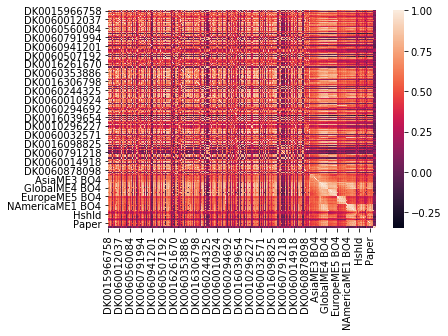

In [25]:
import seaborn as sns
%matplotlib inline

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=30 ,#corr.columns,
        yticklabels=30 #corr.columns,
           )

### 2.1.3 Dynamic Time Wrapping<a class="anchor" id="three.one.two"></a> 

The difference between elastic distance measures and lock-step distance measures is that the elastic measures allow for one-to-many or one-to-none point matching. This gives more flexibility and robustness for example in handling outliers.

DTW is a relatively new method, introduced in 2004, which seeks to overcome some of the disadvantages of the Euclidean distance. In general, DTW calculates an optimal match between two given sequences, ot the path that has the minimal cost (while fulfilling all the restrictions). For further details on oth the algorithm works see [Wikipedia article](https://en.wikipedia.org/wiki/Dynamic_time_warping) or [Pjotr Roelofsens thesis on Time Series Clustering](https://beta.vu.nl/nl/Images/stageverslag-roelofsen_tcm235-882304.pdf).

Here the dtw function in tslearn is used to calculate the dtw value, for docmumentation see [here](https://tslearn.readthedocs.io/en/latest/gen_modules/metrics/tslearn.metrics.dtw.html).

Lets try the function and see how it works.

So it delivers a single similarity measure when two time-series are compared. Now we calculate the dtw matrix comparing all pairs of the time series.

In [26]:
#joined = joined.iloc[:,::4]

In [27]:
joined_np=np.transpose(joined.values) #change the dataframe into a numpy array

distance_dtw =cdist_dtw(joined_np) #calculate the dtw matrix

distance_dtw=pd.DataFrame(data = distance_dtw, index=joined.columns, columns=joined.columns) #save it into a dataframe

In [28]:
distance_dtw

,DK0015966758,DK0060411247,DK0010270693,DK0060790087,DK0015911507,DK0015168686,DK0060814952,DK0060789071,DK0060048304,DK0010170398,...,Insur,RlEst,Fin,Other,LEATTREU Index,LET1TREU Index,LET3TREU Index,LET5TREU Index,LET7TREU Index,LET0TREU Index
DK0015966758,0.000000,0.187894,0.168243,0.291215,0.158374,0.288646,0.236696,0.165823,0.177074,0.235822,...,0.217250,0.271491,0.261482,0.207845,0.267658,0.322590,0.306777,0.288071,0.264280,0.225161
DK0060411247,0.187894,0.000000,0.194757,0.212802,0.214554,0.210130,0.164762,0.173387,0.145839,0.174111,...,0.213452,0.293020,0.284644,0.213738,0.193715,0.240892,0.225733,0.210182,0.191336,0.177170
DK0010270693,0.168243,0.194757,0.000000,0.297621,0.200348,0.294134,0.243161,0.104612,0.162200,0.250316,...,0.215203,0.259873,0.239867,0.209671,0.276646,0.326821,0.310766,0.295054,0.273197,0.236498
DK0060790087,0.291215,0.212802,0.297621,0.000000,0.317580,0.024559,0.105660,0.269965,0.210330,0.106589,...,0.307988,0.407581,0.396839,0.302469,0.058920,0.042344,0.038056,0.042672,0.064553,0.147538
DK0015911507,0.158374,0.214554,0.200348,0.317580,0.000000,0.314987,0.262320,0.204155,0.210222,0.269818,...,0.234533,0.267917,0.275882,0.234356,0.298888,0.351916,0.335559,0.316930,0.295339,0.255180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LET1TREU Index,0.322590,0.240892,0.326821,0.042344,0.351916,0.044010,0.133020,0.300614,0.239228,0.128657,...,0.334698,0.443529,0.427319,0.326490,0.071882,0.000000,0.021158,0.044083,0.077272,0.171827
LET3TREU Index,0.306777,0.225733,0.310766,0.038056,0.335559,0.038609,0.120211,0.283497,0.222812,0.113661,...,0.318331,0.425315,0.410012,0.308774,0.055000,0.021158,0.000000,0.024539,0.059287,0.154364
LET5TREU Index,0.288071,0.210182,0.295054,0.042672,0.316930,0.041405,0.109233,0.266722,0.205986,0.100655,...,0.300416,0.405708,0.391428,0.291285,0.035241,0.044083,0.024539,0.000000,0.037281,0.133915
LET7TREU Index,0.264280,0.191336,0.273197,0.064553,0.295339,0.059714,0.100877,0.244083,0.184922,0.089928,...,0.277054,0.380765,0.366110,0.268238,0.017416,0.077272,0.059287,0.037281,0.000000,0.101718


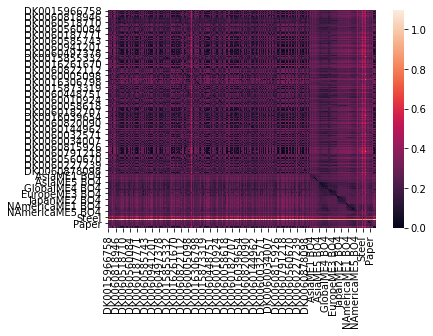

In [29]:
%matplotlib inline

# plot the heatmap
sns.heatmap(distance_dtw, 
        xticklabels=20 ,#corr.columns,
        yticklabels=20 #corr.columns,
           )

And as the with the distance based on correlation an index has a distance of 0 with itself.

## 2.2 Hierarchial clustering <a class="anchor" id="three.two"></a>

Here agglomerative clustering will be used, which is a bottom-up approch. This means that in the beginning all observations form their individual cluster and in each step the closest clusters combine into a new cluster. This is repeated until all observations are in one big cluster. Three methods are most commonly used to define the distance between clusters, Single linkage, Complete linkage and Ward linkage. In single linkage the distance is defined as the smallest distance between any observations in the two clusters, while complete linkage is the biggest distance between any two observations in the two clusters. Ward linkage aims to minimize the variance within each cluster. For further information on hierarchial clustering, see [here](https://beta.vu.nl/nl/Images/stageverslag-roelofsen_tcm235-882304.pdf). 

Scipy.cluster.hierarchy will be used in this section. Documentation on the package used can be found [here](https://docs.scipy.org/doc/scipy-0.9.0/reference/cluster.hierarchy.html). Here it is possible to use the distance matrixes as input into the clustering algorithm.

Tutorial on how to use the packages can be found [here](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/).
 
An important question here is what is the optimal number of clusters? 


This function helps us plot nice dendograms.

In [30]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

### 2.2.1 Single linkage <a class="anchor" id="three.two.one"></a>

Here we use the single linkage method to cluster the indexes for the two different distance measures applied.

In [31]:
#Euclidean distance matrix
con_distance_eu = squareform(distance_eu) #condence the distance matrix to be able to fit the hierarcal clustering
single_eu = single(con_distance_eu) #apply hierarchial clustering using the single distance measure

#corr perman distance matrix
con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
single_corr = single(con_distance_corr) #apply hierarchial clustering using the single distance measure

#dtw distance matrix
con_distance_dtw = squareform(distance_dtw) #condence the distance matrix to be able to fit the hierarcal clustering
single_dtw = single(con_distance_dtw) #apply hierarchial clustering using the single distance measure

Draw the dendrograms.

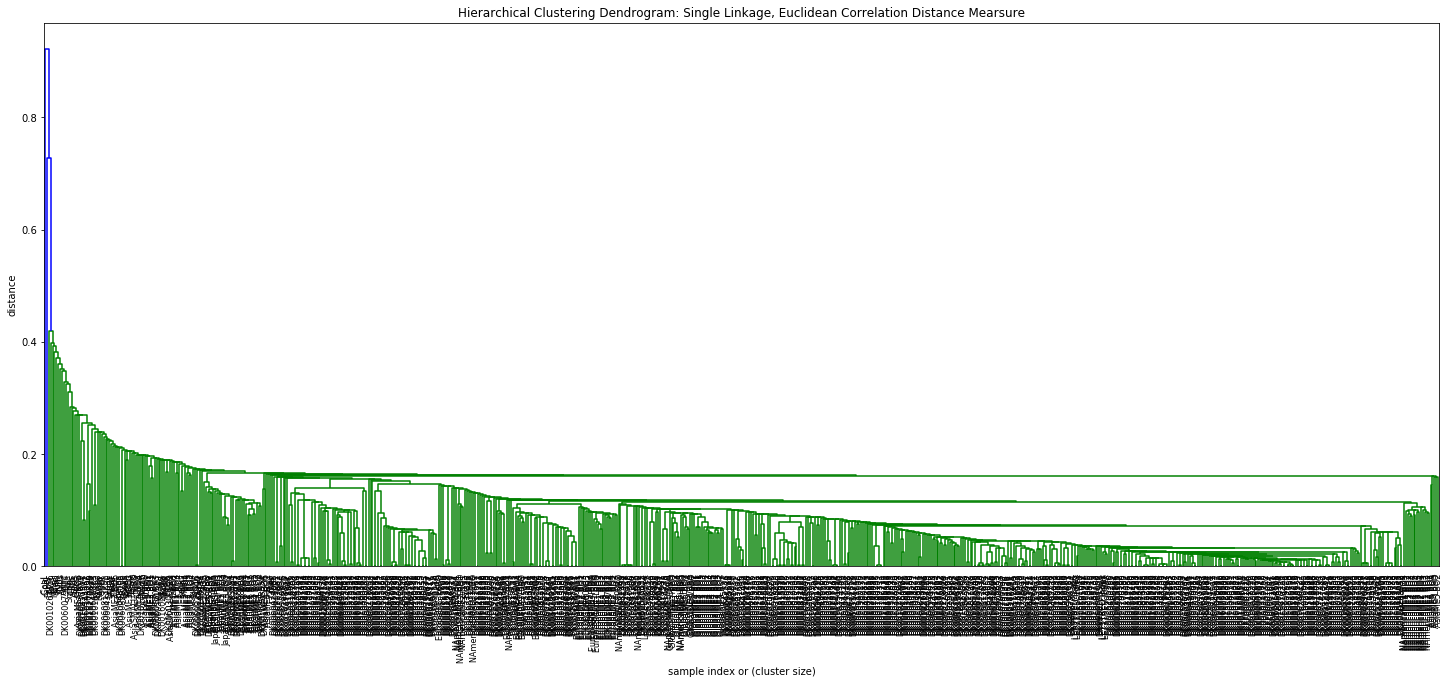

In [32]:
plt.figure(figsize=(25, 10))
#plt.title('Hierarchical Clustering Dendrogram: Single Linkage, Correlation Distance Mearsure')
plt.xlabel('Index')
plt.ylabel('Distance')
fancy_dendrogram(
    single_eu,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    color_threshold = 0.7,# font size for the x axis labels
    labels = distance_corr.index,
 #   max_d=0.35,
    annotate_above=10
)
plt.title('Hierarchical Clustering Dendrogram: Single Linkage, Euclidean Correlation Distance Mearsure')
plt.show()

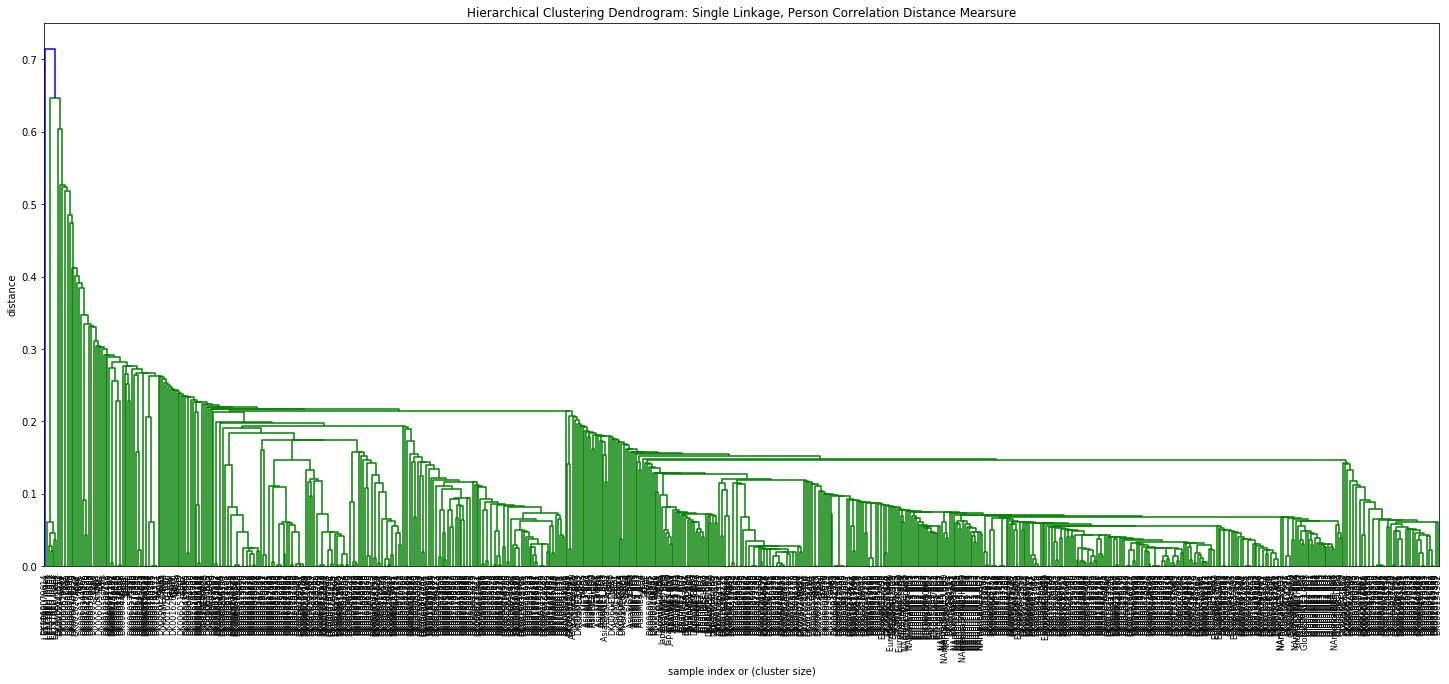

In [33]:
plt.figure(figsize=(25, 10))
#plt.title('Hierarchical Clustering Dendrogram: Single Linkage, Correlation Distance Mearsure')
plt.xlabel('Index')
plt.ylabel('Distance')
fancy_dendrogram(
    single_corr,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    color_threshold = 0.7,# font size for the x axis labels
    labels = distance_corr.index,
 #   max_d=0.35,
    annotate_above=10
)
plt.title('Hierarchical Clustering Dendrogram: Single Linkage, Person Correlation Distance Mearsure')
plt.show()

### 2.2.2 Complete linkage <a class="anchor" id="three.two.two"></a>

Here we use the complete linkage method to cluster the indexes for the two different distance measures applied.

In [34]:
#person corr distance matrix
#con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
complete_eu = complete(con_distance_eu) #apply hierarchial clustering using the single distance measure

#person corr distance matrix
#con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
complete_corr= complete(con_distance_corr) #apply hierarchial clustering using the single distance measure

#dtw distance matrix
#con_distance_dtw = squareform(distance_dtw) #condence the distance matrix to be able to fit the hierarcal clustering
complete_dtw = complete(con_distance_dtw) #apply hierarchial clustering using the single distance measure

Draw the dendrograms.

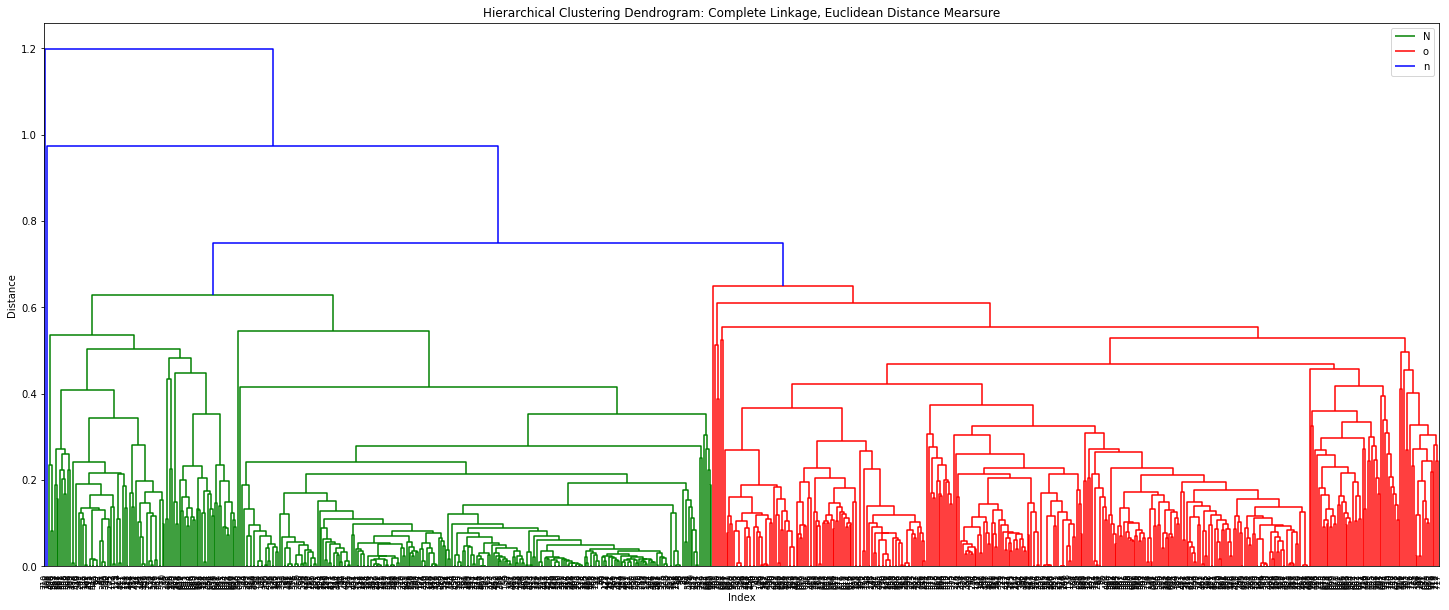

In [35]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    complete_eu,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    color_threshold = 0.7,# font size for the x axis labels
#    labels = ,
#    max_d=0.35,
    annotate_above=10
)
plt.title('Hierarchical Clustering Dendrogram: Complete Linkage, Euclidean Distance Mearsure')
plt.legend("None")
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

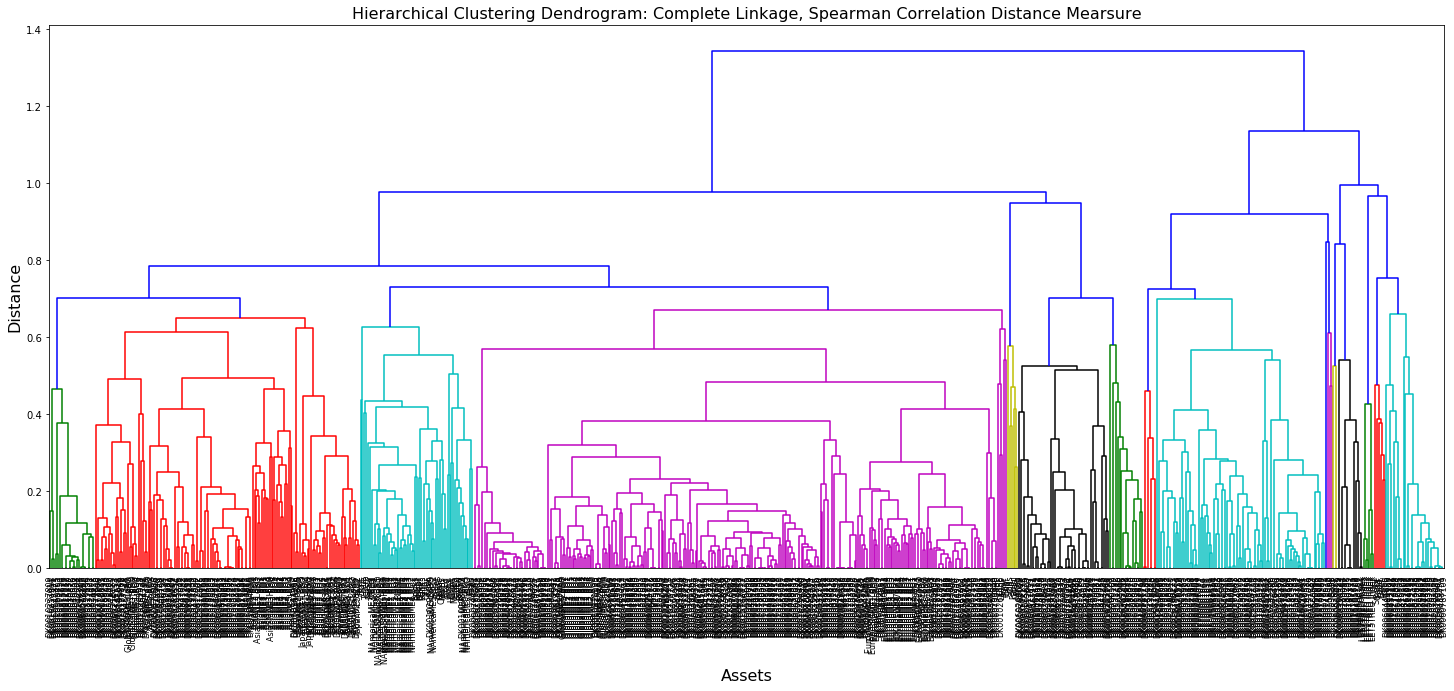

In [36]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    complete_corr,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    color_threshold = 0.7,# font size for the x axis labels
    labels = distance_corr.index,
#    max_d=0.35,
    annotate_above=10
)
plt.title('Hierarchical Clustering Dendrogram: Complete Linkage, Spearman Correlation Distance Mearsure', fontsize = 16)
plt.xlabel('Assets', fontsize = 16)
plt.ylabel('Distance', fontsize = 16)
plt.show()

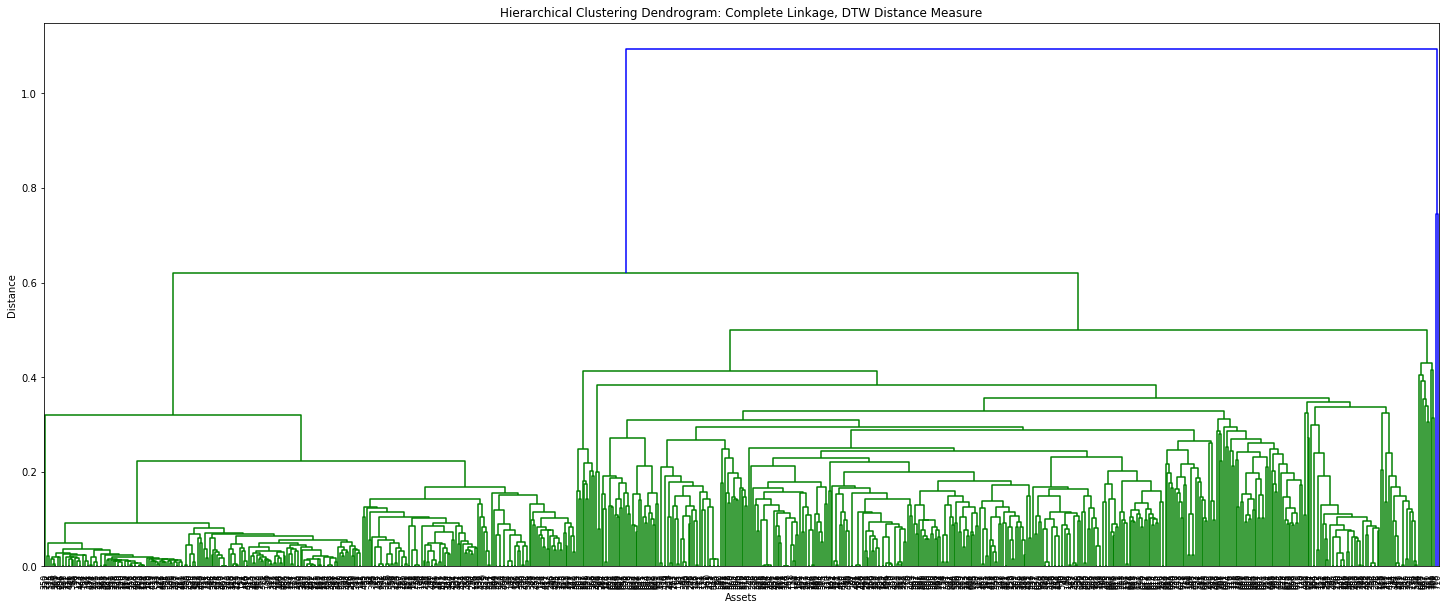

In [37]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    complete_dtw,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    color_threshold = 0.7,# font size for the x axis labels
#    labels = distance_corr.index,
#    max_d=0.35,
    annotate_above=10
)
plt.title('Hierarchical Clustering Dendrogram: Complete Linkage, DTW Distance Measure')
plt.xlabel('Assets')
plt.ylabel('Distance')
plt.show()

### 2.2.3 Ward linkage <a class="anchor" id="three.two.three"></a>

Here we use the ward linkage method to cluster the indexes for the two different distance measures applied.

In [38]:
#spearman corr distance matrix
#con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
ward_eu = ward(con_distance_eu) #apply hierarchial clustering using the single distance measure

#person corr distance matrix
#con_distance_corr = squareform(distance_corr) #condence the distance matrix to be able to fit the hierarcal clustering
ward_corr = ward(con_distance_corr) #apply hierarchial clustering using the single distance measure

#dtw distance matrix
#con_distance_dtw = squareform(distance_dtw) #condence the distance matrix to be able to fit the hierarcal clustering
ward_dtw = ward(con_distance_dtw) #apply hierarchial clustering using the single distance measure

Draw the dendrograms.

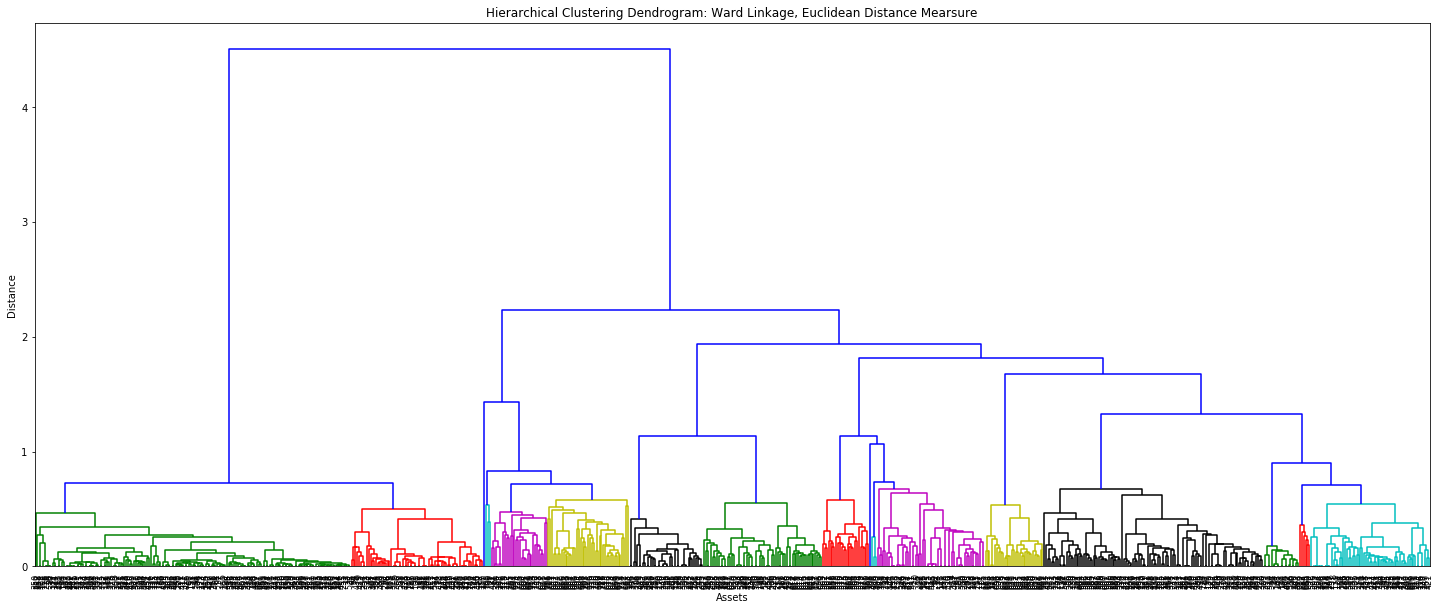

In [39]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    ward_eu,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    color_threshold = 0.7,# font size for the x axis labels
#    labels = 
 #   max_d=0.35,
    annotate_above=10
)
plt.title('Hierarchical Clustering Dendrogram: Ward Linkage, Euclidean Distance Mearsure')
plt.xlabel('Assets')
plt.ylabel('Distance')
plt.show()

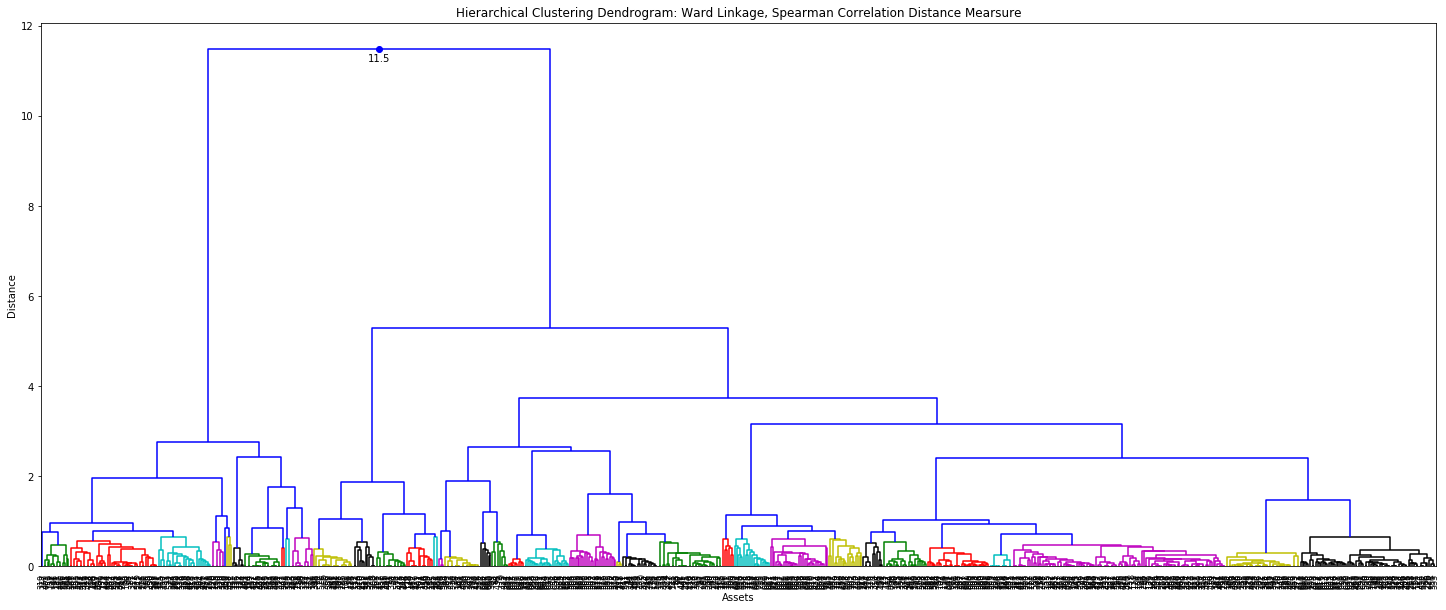

In [40]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    ward_corr,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    color_threshold = 0.7,# font size for the x axis labels
 #   labels = distance_corr.index,
 #   max_d=0.35,
    annotate_above=10
)
plt.title('Hierarchical Clustering Dendrogram: Ward Linkage, Spearman Correlation Distance Mearsure')
plt.xlabel('Assets')
plt.ylabel('Distance')
plt.show()

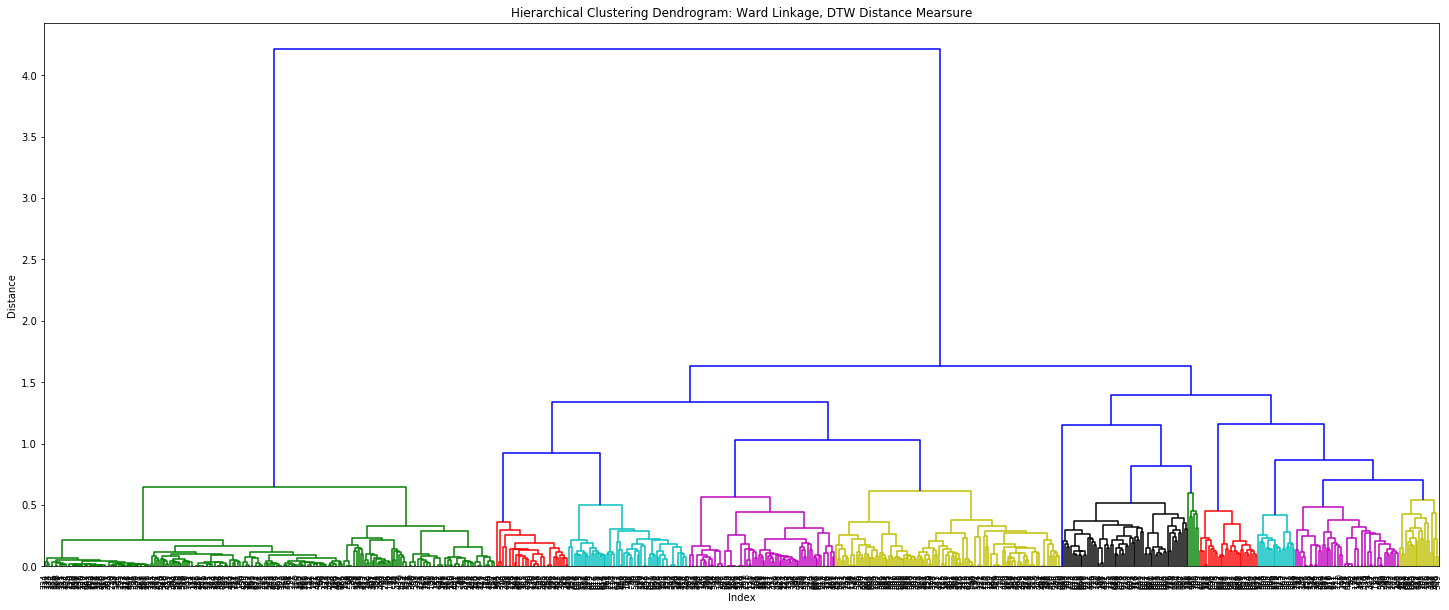

In [41]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    ward_dtw,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    color_threshold = 0.7,# font size for the x axis labels
#    labels = distance_corr.index,
 #   max_d=0.35,
    annotate_above=10
)
plt.title('Hierarchical Clustering Dendrogram: Ward Linkage, DTW Distance Mearsure')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

## 2.3 Finding the Optimal Number of Clusters with the Silhouette Coefficient

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

We begin by looking at the silhouette score for the ward and complete linkages and the correlation and dtw distance measures. The Silhouette Score is calculated by lookin at the intra-cluster distance as well as the mean distance to the nearest cluster for each observation/asset. It returns a score between -1 and 1, -1 suggesting incorrect clustering and 1 really good clustering where the clusteres are very dence.

**Complete Linkage, Correlation Distance Measure.**

In [42]:
vector = []
for i in range(2, 30):
    vector.append(silhouette_score(distance_corr, fcluster(complete_corr, i, criterion="maxclust"), metric="precomputed" ))
    

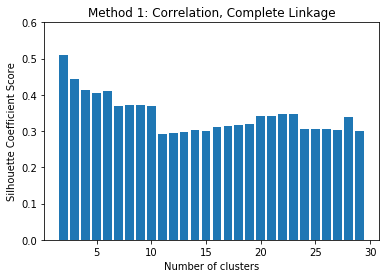

In [43]:
plt.bar(range(2,30), vector)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient Score")
plt.ylim(0,0.6)
plt.title("Method 1: Correlation, Complete Linkage")
plt.show()

**Ward Linkage, Correlation Distance Measure.**

In [44]:
vector = []
for i in range(2, 30):
    vector.append(silhouette_score(distance_corr, fcluster(ward_corr, i, criterion="maxclust"), metric="precomputed" ))

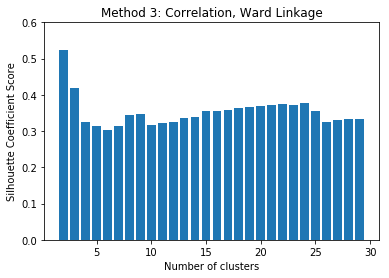

In [45]:
plt.bar(range(2,30), vector)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient Score")
plt.ylim(0,0.6)
plt.title("Method 3: Correlation, Ward Linkage")
plt.show()

**Complete linkage, DTW**

In [46]:
vector = []
for i in range(2, 30):
    vector.append(silhouette_score(distance_dtw, fcluster(complete_dtw, i, criterion="maxclust"), metric="precomputed" ))
    

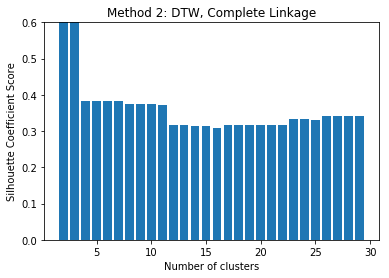

In [47]:
plt.bar(range(2,30), vector)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient Score")
plt.ylim(0,0.6)
plt.title("Method 2: DTW, Complete Linkage")
plt.show()

**Ward linkage, DTW**

In [48]:
vector = []
for i in range(2, 30):
    vector.append(silhouette_score(distance_dtw, fcluster(ward_dtw, i, criterion="maxclust"), metric="precomputed" ))

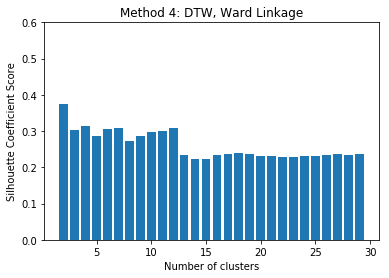

In [49]:
plt.bar(range(2,30), vector)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient Score")
#plt.xticks("")
plt.ylim(0,0.6)
plt.title("Method 4: DTW, Ward Linkage")
plt.show()

**And now we want to save the clustering into a dataframe.**

In [50]:
#Create the dataframe
cluster_df = pd.DataFrame(index=distance_corr.index)

#Save the Ward_Eu clustering into the dataframe with 8 clusters
#cluster_df["Ward_Eu"] = fcluster(ward_eu, 3, criterion="maxclust")

#Save the Ward_Corr clustering into the dataframe with 8 clusters
cluster_df["Ward_Corr"] = fcluster(ward_corr, 3, criterion="maxclust")

#Save the Ward_DTW clustering into the dataframe with 8 clusters
cluster_df["Ward_DTW"] = fcluster(ward_dtw, 3, criterion="maxclust")

#Save the Complete_DTW clustering into the dataframe with 8 clusters
#cluster_df["Complete_Eu"] = fcluster(complete_eu, 3, criterion="maxclust")

#Save the Complete_Corr clustering into the dataframe with 8 clusters
cluster_df["Complete_Corr"] = fcluster(complete_corr, 3, criterion="maxclust")

#Save the Complete_DTW clustering into the dataframe with 8 clusters
cluster_df["Complete_DTW"] = fcluster(complete_dtw, 3, criterion="maxclust")

#Save the Return into the dataframe
cluster_df["AverageRet"] = ret["AvgReturnYearly"]

#Save the Standard Deviation into the dataframe
cluster_df["StandardDev"] = ret["YearlyStd"]

#Add the sharpe ratio to the dataframe
cluster_df["Sharpe_Ratio"] = (ret["AvgReturnYearly"])/ret["YearlyStd"]

#Add the class (ETF or index) to the dataframe
cluster_df["Class"] = classes

In [51]:
#Add the class (ETF or index) to the dataframe
cluster_df["Class"] = classes

In [52]:
cluster_df.head()

,Ward_Corr,Ward_DTW,Complete_Corr,Complete_DTW,AverageRet,StandardDev,Sharpe_Ratio,Class
DK0015966758,3,3,1,1,0.058560,0.155299,0.377080,1.0
DK0060411247,3,2,1,1,0.022940,0.117124,0.195864,1.0
DK0010270693,3,2,1,1,0.087968,0.157189,0.559634,1.0
DK0060790087,2,1,1,1,0.013020,0.023357,0.557429,1.0
DK0015911507,3,3,1,1,0.060717,0.169691,0.357808,1.0


In [53]:
cluster_df.to_csv("/Users/a/Dropbox/Thesis/Thesis/Coding/PreprocessedData/out-clusters-MFandIndices.csv")

In [54]:
cluster_df[cluster_df["Complete_Corr"]==3].head(30)

,Ward_Corr,Ward_DTW,Complete_Corr,Complete_DTW,AverageRet,StandardDev,Sharpe_Ratio,Class
DK0010170398,3,1,3,1,0.034023,0.064096,0.530813,1.0
DK0060429108,3,1,3,1,0.062788,0.076820,0.817341,1.0
DK0060813392,3,1,3,1,0.022431,0.075741,0.296155,1.0
DK0016105703,1,1,3,1,0.016336,0.030216,0.540631,1.0
DK0060789311,1,1,3,1,0.019747,0.056223,0.351221,1.0
DK0016272446,3,1,3,1,0.071584,0.099911,0.716480,1.0
DK0060187771,1,1,3,1,0.018842,0.056233,0.335071,1.0
DK0060356392,1,1,3,1,0.023956,0.026650,0.898917,1.0
DK0060452191,3,1,3,1,0.021234,0.069818,0.304135,1.0
DK0060240687,1,1,3,1,0.020120,0.053406,0.376740,1.0


In [55]:
cluster_df[cluster_df["Complete_Corr"]==1].head(30)

,Ward_Corr,Ward_DTW,Complete_Corr,Complete_DTW,AverageRet,StandardDev,Sharpe_Ratio,Class
DK0015966758,3,3,1,1,0.058560,0.155299,0.377080,1.0
DK0060411247,3,2,1,1,0.022940,0.117124,0.195864,1.0
DK0010270693,3,2,1,1,0.087968,0.157189,0.559634,1.0
DK0060790087,2,1,1,1,0.013020,0.023357,0.557429,1.0
DK0015911507,3,3,1,1,0.060717,0.169691,0.357808,1.0
DK0060814952,2,1,1,1,0.013964,0.067291,0.207518,1.0
DK0060789071,3,2,1,1,0.093240,0.144645,0.644610,1.0
DK0060048304,3,2,1,1,0.081270,0.116146,0.699723,1.0
DK0060522316,3,3,1,1,0.021067,0.183982,0.114504,1.0
DK0060819084,2,1,1,1,0.005901,0.025917,0.227702,1.0


In [56]:
cluster_df[cluster_df["Complete_Corr"]==2].head(30)

,Ward_Corr,Ward_DTW,Complete_Corr,Complete_DTW,AverageRet,StandardDev,Sharpe_Ratio,Class
DK0015168686,1,1,2,1,0.019976,0.023585,0.846957,1.0
DK0060788347,1,1,2,1,0.016875,0.022052,0.765244,1.0
DK0060272961,1,1,2,1,0.008208,0.017699,0.463759,1.0
DK0060014678,1,1,2,1,0.010915,0.016232,0.672474,1.0
DK0016066111,1,1,2,1,0.014712,0.025153,0.584896,1.0
DK0060818789,1,1,2,1,0.023915,0.039179,0.610398,1.0
DK0016027212,1,1,2,1,0.010646,0.018597,0.572445,1.0
DK0060560084,1,1,2,1,0.007550,0.022034,0.342663,1.0
DK0060773901,1,1,2,1,0.037042,0.031739,1.167063,1.0
DK0016023302,1,1,2,1,0.009880,0.023747,0.416034,1.0
